In [1]:
#Work based on 
# Market share dynamics using Lotka–Volterra models
# Determining firms' utility functions and competitive roles from data on market shares using Lotka–Volterra models

In [2]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
#cParams['figure.figsize'] = 30, 615
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import itertools
import warnings
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import squarify
from scipy.optimize import curve_fit
# importing functools for reduce() 
import functools 
from numpy.polynomial import Polynomial as P

from sklearn import linear_model
import math

In [3]:
def func(x, a, b, c):
     return a + b*x + c*x**2

In [4]:
#Annual data

In [5]:
ms1df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms1.csv')
ms1df.head()

,time,tescoshare,logtescoshare
0,1971,0.072,-2.631089
1,1974,0.086,-2.453408
2,1977,0.083,-2.488915
3,1978,0.124,-2.087474
4,1982,0.143,-1.944911


In [6]:
ms2df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms2.csv')
ms2df.head()

,time,sainsburyshare,logsainsburyshare
0,1978,0.106,-2.244316
1,1982,0.145,-1.931022
2,1984,0.116,-2.154165
3,1987,0.123,-2.095571
4,1988,0.145,-1.931022


In [7]:
ms3df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms3.csv')
ms3df.head()

,time,asdashare,logasdashare
0,1970,0.015,-4.199705
1,1973,0.025,-3.688879
2,1976,0.047,-3.057608
3,1978,0.063,-2.764621
4,1980,0.080,-2.525729


In [8]:
ms4df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms4.csv')
ms4df.head()

,time,morrisonshare,logmorrisonshare
0,1987,0.009,-4.710531
1,1989,0.012,-4.422849
2,1990,0.014,-4.268698
3,1991,0.017,-4.074542
4,1992,0.017,-4.074542


In [9]:
ms5df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms5.csv')
ms5df.head()

,time,aldishare,logaldishare
0,1994.0,0.003,-5.809143
1,1995.0,0.008,-4.828314
2,1996.0,0.009,-4.710531
3,1997.0,0.008,-4.828314
4,1998.0,0.008,-4.828314


In [10]:
ms6df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms6.csv')
ms6df.head()

,time,coopshare,logcoopshare
0,1980,0.090,-2.407946
1,1987,0.076,-2.577022
2,1989,0.076,-2.577022
3,1990,0.082,-2.501036
4,1991,0.081,-2.513306


In [11]:
ms7df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms7.csv')
ms7df.head()

,time,lidlshare,loglidlshare
0,1995,0.003,-5.809143
1,1996,0.005,-5.298317
2,1997,0.006,-5.115996
3,1998,0.007,-4.961845
4,1999,0.010,-4.605170


In [12]:
ms8df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms8.csv')
ms8df.head()

,time,waitroseshare,logwaitroseshare
0,1984,0.021,-3.863233
1,1987,0.023,-3.772261
2,1990,0.017,-4.074542
3,1991,0.017,-4.074542
4,1992,0.017,-4.074542


In [13]:
ms9df = pd.read_csv(r'D:\\neatwriteup\data\marketsharedynamics\ms9.csv')
ms9df.head()

,time,icelandshare,logicelandshare
0,1989,0.011,-4.509860
1,1990,0.012,-4.422849
2,1991,0.013,-4.342806
3,1992,0.015,-4.199705
4,1993,0.016,-4.135167


In [14]:
dfs=[ms1df,ms2df,ms3df,ms4df, ms5df, ms6df, ms7df, ms8df, ms9df]

In [15]:
share1 = pd.merge(ms1df,ms2df, on='time')
share2= pd.merge(share1,ms3df, on='time')
share3=pd.merge(share2,ms4df, on='time')
share4=pd.merge(share3,ms5df, on='time')
share5=pd.merge(share4,ms6df, on='time')
share6=pd.merge(share5,ms7df, on='time')
share7=pd.merge(share6,ms8df, on='time')
shares=pd.merge(share7,ms9df, on='time')

shares.head()

,time,tescoshare,logtescoshare,sainsburyshare,logsainsburyshare,asdashare,logasdashare,morrisonshare,logmorrisonshare,aldishare,logaldishare,coopshare,logcoopshare,lidlshare,loglidlshare,waitroseshare,logwaitroseshare,icelandshare,logicelandshare
0,1995,0.208,-1.570217,0.191,-1.655482,0.107,-2.234926,0.040,-3.218876,0.008,-4.828314,0.065,-2.733368,0.003,-5.809143,0.017,-4.074542,0.032,-3.442019
1,1996,0.215,-1.537117,0.197,-1.624552,0.118,-2.137071,0.042,-3.170086,0.009,-4.710531,0.061,-2.796881,0.005,-5.298317,0.018,-4.017384,0.029,-3.540459
2,1997,0.226,-1.487220,0.196,-1.629641,0.125,-2.079442,0.040,-3.218876,0.008,-4.828314,0.059,-2.830218,0.006,-5.115996,0.018,-4.017384,0.030,-3.506558
3,1998,0.230,-1.469676,0.190,-1.660731,0.130,-2.040221,0.043,-3.146555,0.008,-4.828314,0.047,-3.057608,0.007,-4.961845,0.018,-4.017384,0.033,-3.411248
4,1999,0.237,-1.439695,0.182,-1.703749,0.132,-2.024953,0.043,-3.146555,0.016,-4.135167,0.062,-2.780621,0.010,-4.605170,0.027,-3.611918,0.028,-3.575551


In [16]:
shares.set_index('time',drop=True, inplace=True)

In [17]:
sharesonlydf=shares.drop(['logtescoshare','logsainsburyshare','logasdashare','logmorrisonshare','logaldishare','logcoopshare','loglidlshare','logwaitroseshare','logicelandshare'], 1)

In [18]:
sharesonlydf.head()

,tescoshare,sainsburyshare,asdashare,morrisonshare,aldishare,coopshare,lidlshare,waitroseshare,icelandshare
time,,,,,,,,,
1995,0.208,0.191,0.107,0.040,0.008,0.065,0.003,0.017,0.032
1996,0.215,0.197,0.118,0.042,0.009,0.061,0.005,0.018,0.029
1997,0.226,0.196,0.125,0.040,0.008,0.059,0.006,0.018,0.030
1998,0.230,0.190,0.130,0.043,0.008,0.047,0.007,0.018,0.033
1999,0.237,0.182,0.132,0.043,0.016,0.062,0.010,0.027,0.028


In [19]:
sharessum=sharesonlydf.sum(axis = 1, skipna = True)
sharessum.head()

time
1995    0.671
1996    0.694
1997    0.708
1998    0.706
1999    0.737
dtype: float64

In [20]:
outergood=1-sharessum
outergood.head()

time
1995    0.329
1996    0.306
1997    0.292
1998    0.294
1999    0.263
dtype: float64

In [21]:
logshares=np.log(sharesonlydf)
logshares.head()

,tescoshare,sainsburyshare,asdashare,morrisonshare,aldishare,coopshare,lidlshare,waitroseshare,icelandshare
time,,,,,,,,,
1995,-1.570217,-1.655482,-2.234926,-3.218876,-4.828314,-2.733368,-5.809143,-4.074542,-3.442019
1996,-1.537117,-1.624552,-2.137071,-3.170086,-4.710531,-2.796881,-5.298317,-4.017384,-3.540459
1997,-1.487220,-1.629641,-2.079442,-3.218876,-4.828314,-2.830218,-5.115996,-4.017384,-3.506558
1998,-1.469676,-1.660731,-2.040221,-3.146555,-4.828314,-3.057608,-4.961845,-4.017384,-3.411248
1999,-1.439695,-1.703749,-2.024953,-3.146555,-4.135167,-2.780621,-4.605170,-3.611918,-3.575551


In [22]:
logouter=np.log(outergood)
logouter.head()

time
1995   -1.111698
1996   -1.184170
1997   -1.231001
1998   -1.224176
1999   -1.335601
dtype: float64

In [23]:
tescoutilitydf=logshares['tescoshare']-logouter
sainsburyutilitydf=logshares['sainsburyshare']-logouter
asdautilitydf=logshares['asdashare']-logouter
morrisonutilitydf=logshares['morrisonshare']-logouter
aldiutilitydf=logshares['aldishare']-logouter
cooputilitydf=logshares['coopshare']-logouter
lidlutilitydf=logshares['lidlshare']-logouter
waitroseutilitydf=logshares['waitroseshare']-logouter
icelandutilitydf=logshares['icelandshare']-logouter

In [24]:
utilitydf=pd.DataFrame()
utilitydf['tesco']=tescoutilitydf
utilitydf['sainsburys']=sainsburyutilitydf
utilitydf['asda']=asdautilitydf
utilitydf['morrisons']=morrisonutilitydf
utilitydf['aldi']=aldiutilitydf
utilitydf['co op']=cooputilitydf
utilitydf['lidl']=lidlutilitydf
utilitydf['waitrose']=waitroseutilitydf
utilitydf['iceland']=icelandutilitydf

Text(0, 0.5, 'market share')

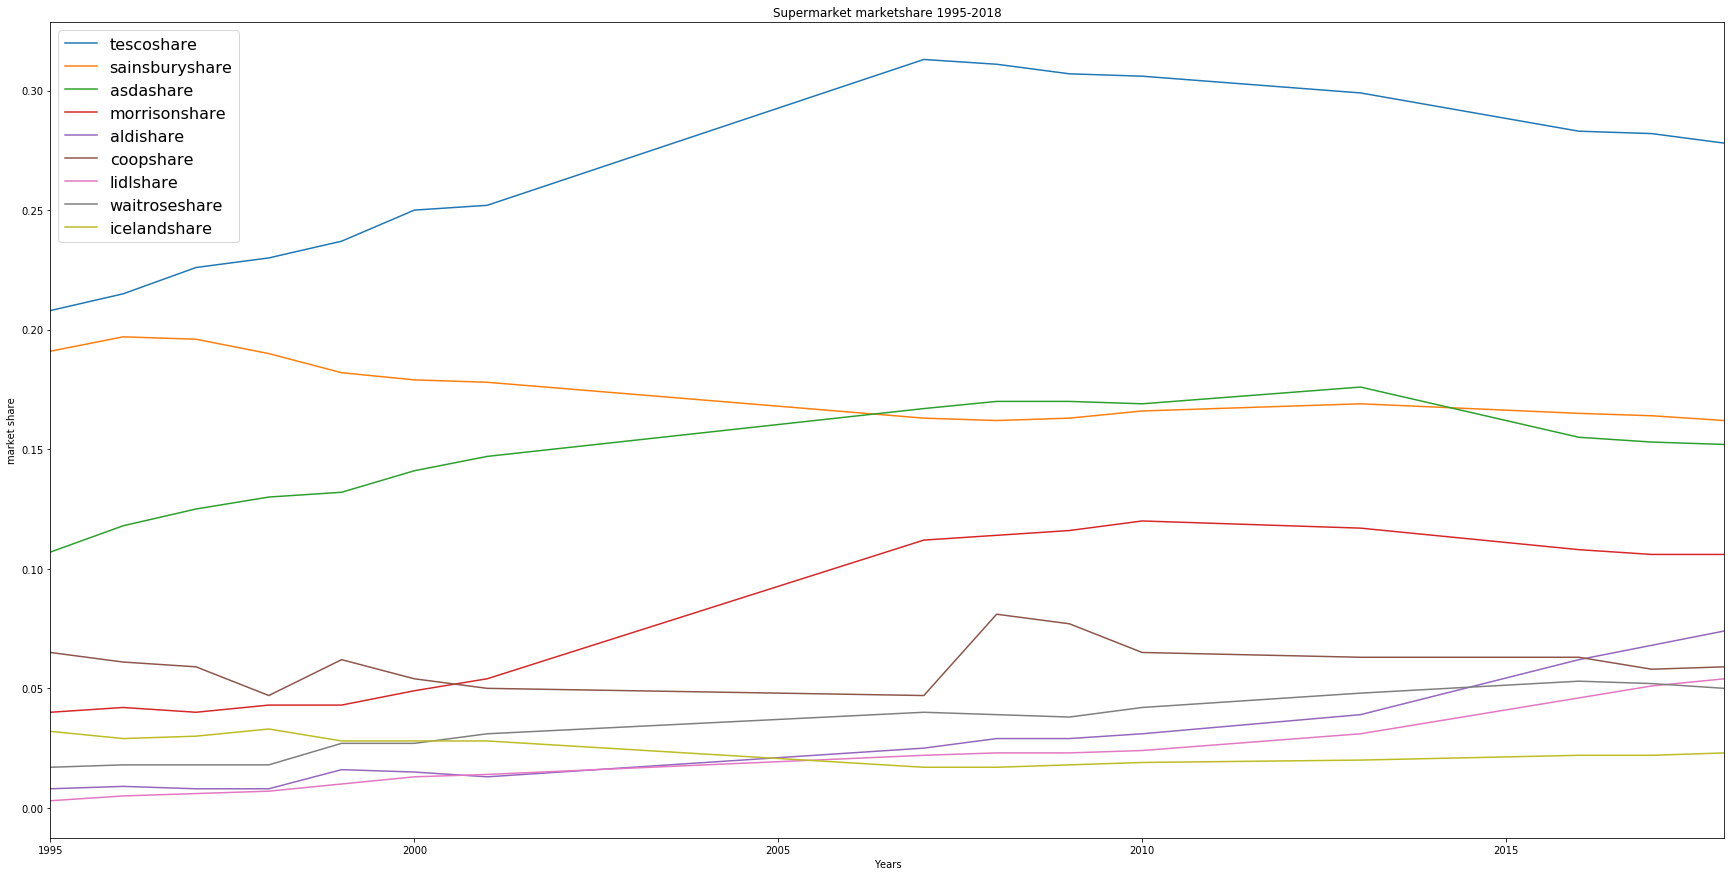

In [25]:
sharesonlydf.plot(figsize=(30,15))
plt.legend(loc=2, prop={'size': 16})
plt.title('Supermarket marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')

Text(0, 0.5, 'utility function')

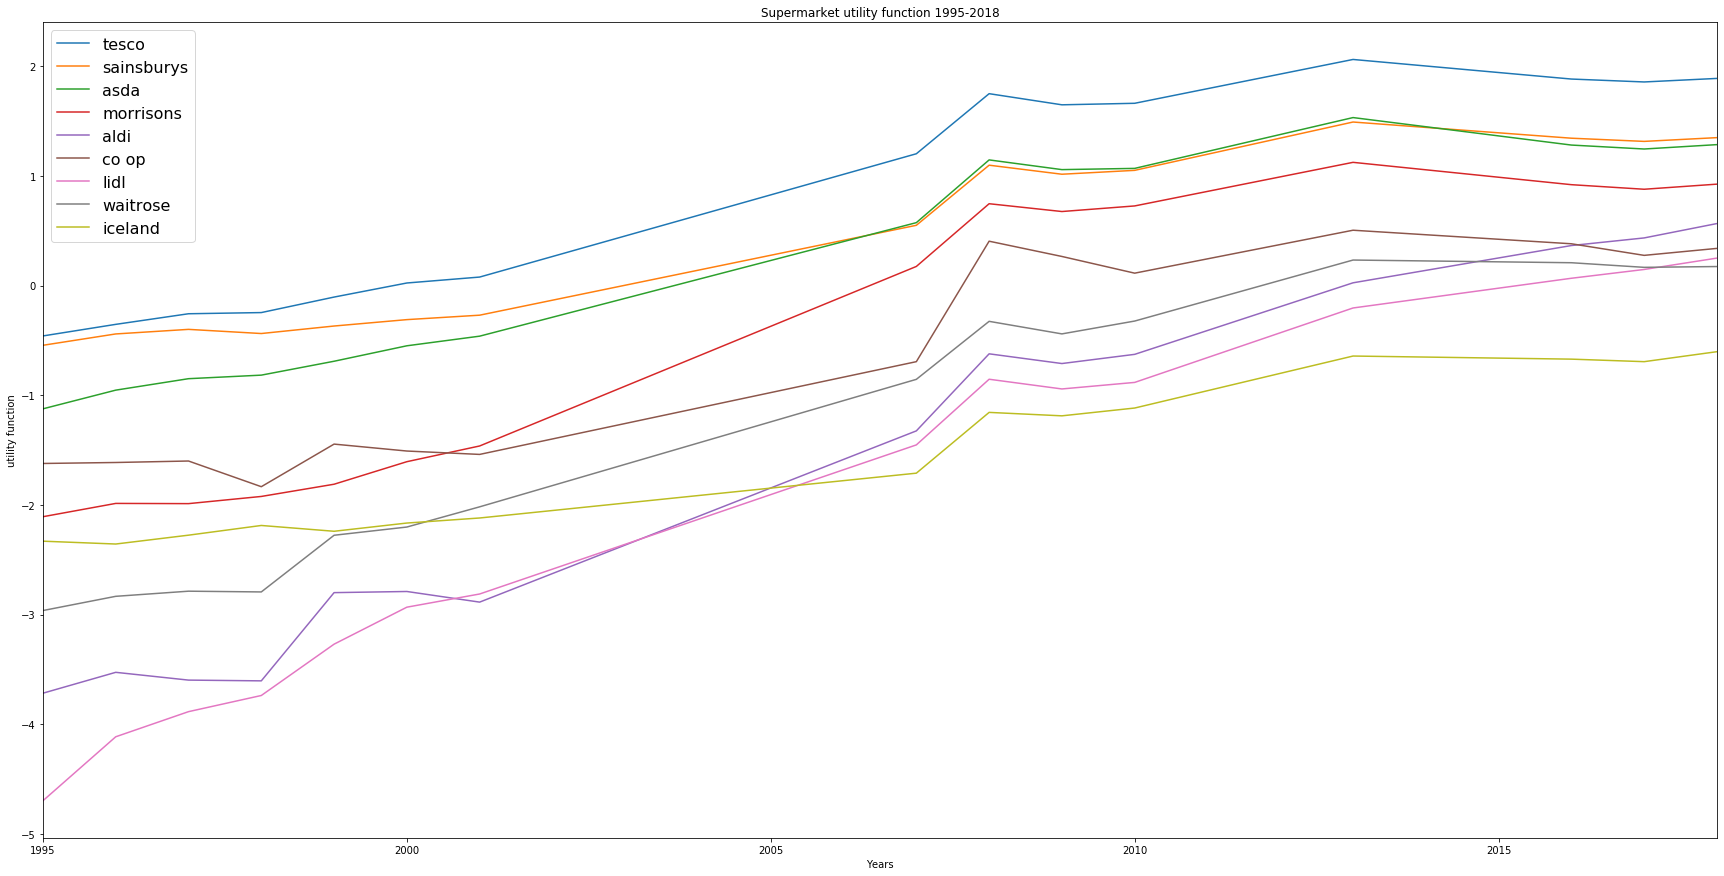

In [26]:
utilitydf.plot(figsize=(30,15))
plt.legend(loc=2, prop={'size': 16})
plt.title('Supermarket utility function 1995-2018')
plt.xlabel('Years')
plt.ylabel('utility function')

In [27]:
def func(x, a, b, c):
     return a + b*x + c*x**2

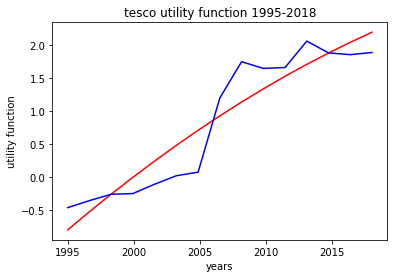

array([-7.28156170e+03,  7.12876382e+00, -1.74398864e-03])

In [28]:
ydata=tescoutilitydf
xdata = np.linspace(1995, 2018, 15)
poptesco, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptesco), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('tesco utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
poptesco

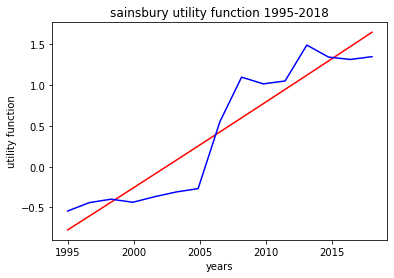

array([ 1.22614592e+02, -2.27235470e-01,  8.29001232e-05])

In [29]:
ydata=sainsburyutilitydf
xdata = np.linspace(1995, 2018, 15)

poptsainsbury, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptsainsbury), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('sainsbury utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
poptsainsbury

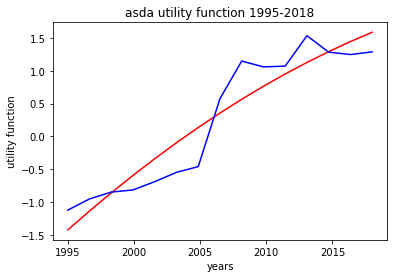

array([-8.62886178e+03,  8.47037823e+00, -2.07811950e-03])

In [30]:
ydata=asdautilitydf
xdata = np.linspace(1995, 2018, 15)
poptasda, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptasda), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('asda utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
poptasda

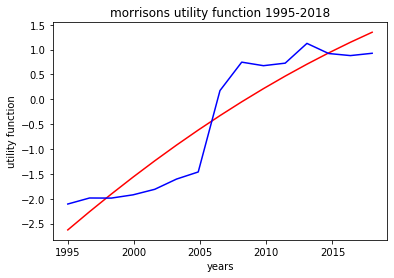

array([-9.81452460e+03,  9.60949101e+00, -2.35150232e-03])

In [31]:
ydata=morrisonutilitydf
xdata = np.linspace(1995, 2018, 15)
poptmorrisons, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptmorrisons), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('morrisons utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
poptmorrisons

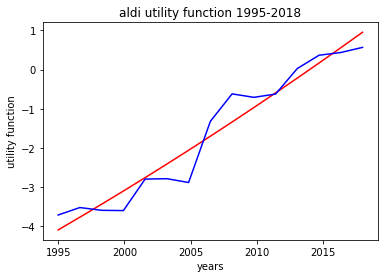

array([ 3.56307890e+03, -3.77286385e+00,  9.94889807e-04])

In [32]:
ydata=aldiutilitydf
xdata = np.linspace(1995, 2018, 15)
poptaldi, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptaldi), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('aldi utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
poptaldi

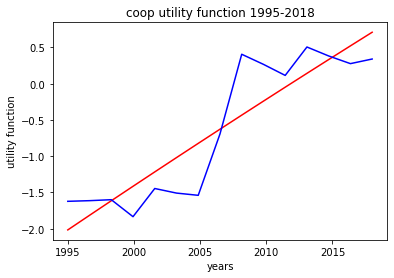

array([-1.02179899e+03,  8.99392527e-01, -1.94598021e-04])

In [33]:
ydata=cooputilitydf
xdata = np.linspace(1995, 2018, 15)
poptcoop, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptcoop), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('coop utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
poptcoop

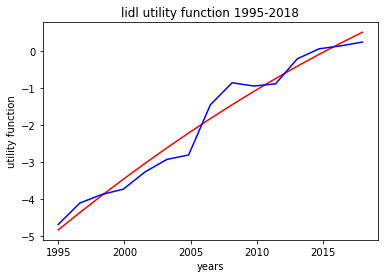

array([-1.07662968e+04,  1.04965320e+01, -2.55755394e-03])

In [34]:
ydata=lidlutilitydf
xdata = np.linspace(1995, 2018, 15)
poptlidl, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptlidl), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('lidl utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
poptlidl

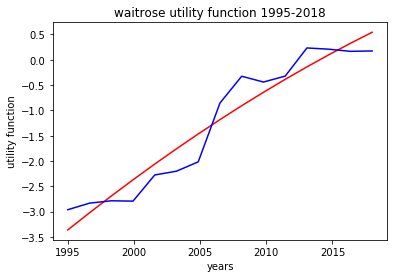

array([-7.24758134e+03,  7.05309351e+00, -1.71524106e-03])

In [35]:
ydata=waitroseutilitydf
xdata = np.linspace(1995, 2018, 15)
poptwaitrose, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptwaitrose), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('waitrose utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
poptwaitrose

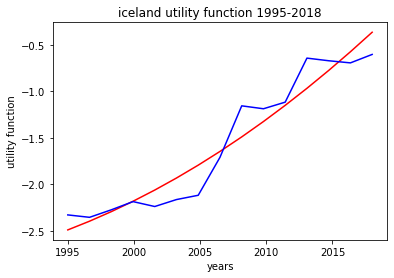

array([ 6.48683433e+03, -6.56001459e+00,  1.65775412e-03])

In [36]:
ydata=icelandutilitydf
xdata = np.linspace(1995, 2018, 15)
popticeland, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popticeland), 'r-')
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('iceland utility function 1995-2018')
plt.xlabel('years')
plt.ylabel('utility function')

plt.show()
popticeland

estimate marketshare from fitted function

In [37]:
# poly is fitting polynominal for marketshare 
#D is derivative of polynominal 
# G is G factor which indicates competitive role in LV equations

etesco=[]
Gtesco=[]
esainsbury=[]
Gsainsbury=[]
easda=[]
Gasda=[]
emorrisons=[]
Gmorrisons=[]
ealdi=[]
Galdi=[]
ecoop=[]
Gcoop=[]
elidl=[]
Glidl=[]
ewaitrose=[]
Gwaitrose=[]
eiceland=[]
Giceland=[]
eouter=[]
esum=[]

for i in xdata:
    poly1=np.exp(poptesco[0] + poptesco[1]*i +poptesco[2]*(i**2));etesco.append(poly1)
    Dtesco= (poptesco[1] + 2*poptesco[2]*(i));Gtesco.append(Dtesco)
    poly2=np.exp(poptsainsbury[0] + poptsainsbury[1]*i +poptsainsbury[2]*(i**2));esainsbury.append(poly2)
    Dsainsbury= (poptsainsbury[1] +2*poptsainsbury[2]*(i));Gsainsbury.append(Dsainsbury)
    poly3=np.exp(poptasda[0] + poptasda[1]*i +poptasda[2]*(i**2));easda.append(poly3)
    Dasda= (poptasda[1] +2*poptasda[2]*(i));Gasda.append(Dasda)
    poly4=np.exp(poptmorrisons[0] + poptmorrisons[1]*i +poptmorrisons[2]*(i**2));emorrisons.append(poly4)
    Dmorrisons= (poptmorrisons[1] +2*poptmorrisons[2]*(i));Gmorrisons.append(Dmorrisons)
    poly5=np.exp(poptaldi[0] + poptaldi[1]*i +poptaldi[2]*(i**2));ealdi.append(poly5)
    Daldi= (poptaldi[1] +2*poptaldi[2]*(i));Galdi.append(Daldi)
    poly6=np.exp(poptcoop[0] + poptcoop[1]*i +poptcoop[2]*(i**2));ecoop.append(poly6)
    Dcoop= (poptcoop[1] +2*poptcoop[2]*(i));Gcoop.append(Dcoop)
    poly7=np.exp(poptlidl[0] + poptlidl[1]*i +poptlidl[2]*(i**2));elidl.append(poly7)
    Dlidl= (poptlidl[1] +2*poptlidl[2]*(i));Glidl.append(Dlidl)
    poly8=np.exp(poptwaitrose[0] + poptwaitrose[1]*i +poptwaitrose[2]*(i**2));ewaitrose.append(poly8)
    Dwaitrose= (poptwaitrose[1] +2*poptwaitrose[2]*(i));Gwaitrose.append(Dwaitrose)
    poly9=np.exp(popticeland[0] + popticeland[1]*i +popticeland[2]*(i**2));eiceland.append(poly9)
    Diceland= (popticeland[1] +2*popticeland[2]*(i));Giceland.append(Diceland)

    poly10=poly1+poly2+poly3+poly4+poly5+poly6+poly7+poly8+poly9+1;esum.append(poly10)









esum

[2.49930601545758,
 2.9028236489682633,
 3.413019365837382,
 4.0545042746810935,
 4.856305404889605,
 5.852355241597392,
 7.082016611854223,
 8.590686234054104,
 10.4305612456555,
 12.661718434712459,
 15.353758532883873,
 18.588427854755196,
 22.463878658885918,
 27.101618967978904,
 32.657814854651946]

In [38]:
sharesonlydf.head()

,tescoshare,sainsburyshare,asdashare,morrisonshare,aldishare,coopshare,lidlshare,waitroseshare,icelandshare
time,,,,,,,,,
1995,0.208,0.191,0.107,0.040,0.008,0.065,0.003,0.017,0.032
1996,0.215,0.197,0.118,0.042,0.009,0.061,0.005,0.018,0.029
1997,0.226,0.196,0.125,0.040,0.008,0.059,0.006,0.018,0.030
1998,0.230,0.190,0.130,0.043,0.008,0.047,0.007,0.018,0.033
1999,0.237,0.182,0.132,0.043,0.016,0.062,0.010,0.027,0.028


MAPE= 5.380276935337649 %
MSE= 0.004501486264672191
RMSE= 0.06709311637323304


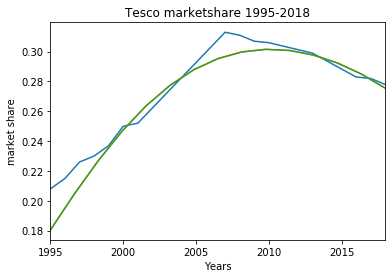

In [39]:
x=xdata
y = [b/m for b,m in zip(etesco, esum)]
sharesonlydf['tescoshare'].plot()
plt.plot(x,y, label ='polynominial fit')
s1=np.std(y)
s2=np.std(sharesonlydf['tescoshare'])
FS=abs(s1-s2)/abs(s1+s2)
#print('FS=', FS)

MAPE=abs((sharesonlydf['tescoshare'] - y)/sharesonlydf['tescoshare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['tescoshare'] - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('Tesco marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')





plt.plot(x,y)

MAPE= 3.3714884073267477 %
MSE= 0.0007478953512084912
RMSE= 0.027347675426048393


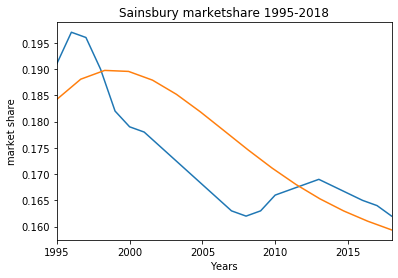

In [40]:
x=xdata
y = [b/m for b,m in zip(esainsbury, esum)]
sharesonlydf['sainsburyshare'].plot()
MAPE=abs((sharesonlydf['sainsburyshare'] - y)/sharesonlydf['sainsburyshare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['sainsburyshare'] - y)**2).sum()
print('MSE=', MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)


plt.title('Sainsbury marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')
plt.plot(x,y)

MAPE= 4.5862853901687 %
MSE= 0.0009988520217809925
RMSE= 0.031604620260034647


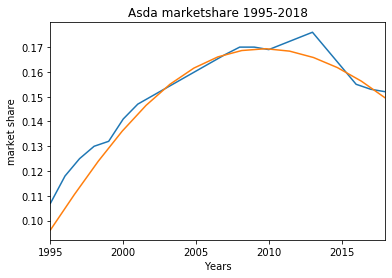

In [41]:
x=xdata
y = [b/m for b,m in zip(easda, esum)]
sharesonlydf['asdashare'].plot()
MAPE=abs((sharesonlydf['asdashare'] - y)/sharesonlydf['asdashare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['asdashare'] - y)**2).sum()
print('MSE=', MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)
plt.title('Asda marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')


plt.plot(x,y)

MAPE= 19.739341809210483 %
MSE= 0.003617314696609868
RMSE= 0.060144116059759896


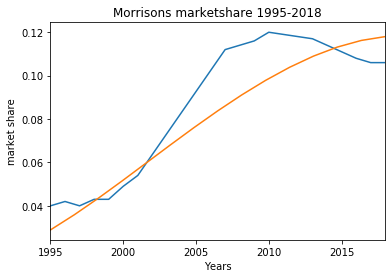

In [42]:
x=xdata
y = [b/m for b,m in zip(emorrisons, esum)]
sharesonlydf['morrisonshare'].plot()
MAPE=abs((sharesonlydf['morrisonshare'] - y)/sharesonlydf['morrisonshare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['morrisonshare'] - y)**2).sum()
print('MSE=', MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)
plt.title('Morrisons marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')
plt.plot(x,y)

MAPE= 15.287491565125405 %
MSE= 0.02504989473854929 %
RMSE= 0.015827158537952822


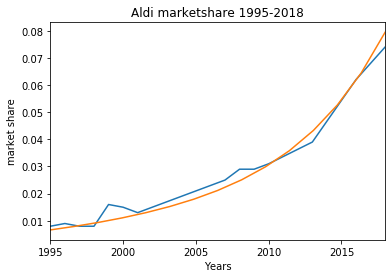

In [43]:
x=xdata
y = [b/m for b,m in zip(ealdi, esum)]
sharesonlydf['aldishare'].plot()
MAPE=abs((sharesonlydf['aldishare'] - y)/sharesonlydf['aldishare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['aldishare'] - y)**2).sum()
print('MSE=', MSE*100, '%')
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)
plt.title('Aldi marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')
plt.plot(x,y)

MAPE= 12.631711919012387 %
MSE= 0.0013776877579723124
RMSE= 0.037117216463149715


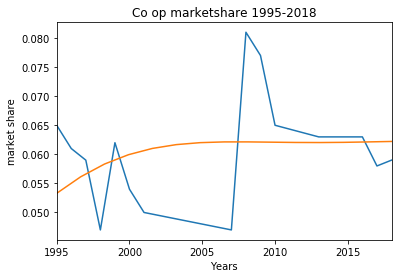

In [44]:
x=xdata
y = [b/m for b,m in zip(ecoop, esum)]
sharesonlydf['coopshare'].plot()
MAPE=abs((sharesonlydf['coopshare'] - y)/sharesonlydf['coopshare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['coopshare'] - y)**2).sum()
print('MSE=', MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)
plt.title('Co op marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')
plt.plot(x,y)

MAPE= 9.95153438453426 %
MSE= 0.00015808422526745222
RMSE= 0.01257315494485979


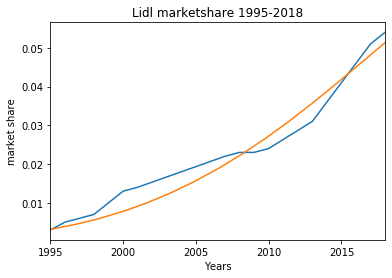

In [45]:
x=xdata
y = [b/m for b,m in zip(elidl, esum)]
sharesonlydf['lidlshare'].plot()
MAPE=abs((sharesonlydf['lidlshare'] - y)/sharesonlydf['lidlshare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['lidlshare'] - y)**2).sum()
print('MSE=', MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)
plt.title('Lidl marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')
plt.plot(x,y)

MAPE= 8.257595782644152 %
MSE= 0.01105287409689856 %
RMSE= 0.010513265000416645


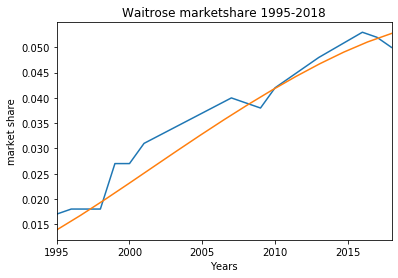

In [46]:
x=xdata
y = [b/m for b,m in zip(ewaitrose, esum)]
sharesonlydf['waitroseshare'].plot()
MAPE=abs((sharesonlydf['waitroseshare'] - y)/sharesonlydf['waitroseshare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['waitroseshare'] - y)**2).sum()
print('MSE=', MSE*100, '%')
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)
plt.title('Waitrose marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')
plt.plot(x,y)

MAPE= 11.285556467607737 %
MSE= 0.00013753447599084066
RMSE= 0.011727509368610228


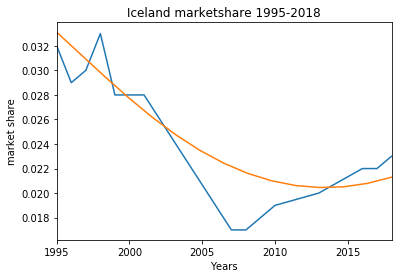

In [47]:
x=xdata
y = [b/m for b,m in zip(eiceland, esum)]
sharesonlydf['icelandshare'].plot()
MAPE=abs((sharesonlydf['icelandshare'] - y)/sharesonlydf['icelandshare']).sum()/15
print('MAPE=', MAPE*100, '%')
MSE=((sharesonlydf['icelandshare'] - y)**2).sum()
print('MSE=', MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)
plt.title('Iceland marketshare 1995-2018')
plt.xlabel('Years')
plt.ylabel('market share')
plt.plot(x,y)

Mean square error (MSE), Root mean square error (RMSE)and mean absolute percentage error (MAPE)
Prediction capability levels of MAPE.
MAPE% Prediction capability
<  10 Highly accurate
10−20 Good
20−50 Reasonable
50+   Inaccurate






In [48]:
#competitive roles

In [49]:
Gdf=pd.DataFrame()
Gdf['tesco']=Gtesco
Gdf['sainsburys']=Gsainsbury
Gdf['asda']=Gasda
Gdf['morrisons']=Gmorrisons
Gdf['aldi']=Galdi
Gdf['co op']=Gcoop
Gdf['lidl']=Glidl
Gdf['waitrose']=Gwaitrose
Gdf['iceland']=Giceland
Gdf['time']=sharesonlydf.index
Gdf.set_index('time',drop=True, inplace=True)
Gdf

,tesco,sainsburys,asda,morrisons,aldi,co op,lidl,waitrose,iceland
time,,,,,,,,,
1995,0.170249,0.103536,0.178681,0.226997,0.196746,0.122946,0.291892,0.209282,0.054424
1996,0.164519,0.103808,0.171853,0.219270,0.200015,0.122307,0.283488,0.203646,0.059871
1997,0.158789,0.104081,0.165025,0.211544,0.203284,0.121668,0.275085,0.198010,0.065318
1998,0.153058,0.104353,0.158197,0.203818,0.206553,0.121028,0.266682,0.192374,0.070765
1999,0.147328,0.104626,0.151369,0.196091,0.209822,0.120389,0.258278,0.186739,0.076212
2000,0.141598,0.104898,0.144541,0.188365,0.213091,0.119749,0.249875,0.181103,0.081659
2001,0.135868,0.105170,0.137713,0.180639,0.216360,0.119110,0.241471,0.175467,0.087106
2007,0.130137,0.105443,0.130885,0.172912,0.219629,0.118471,0.233068,0.169831,0.092553
2008,0.124407,0.105715,0.124057,0.165186,0.222898,0.117831,0.224665,0.164195,0.098000


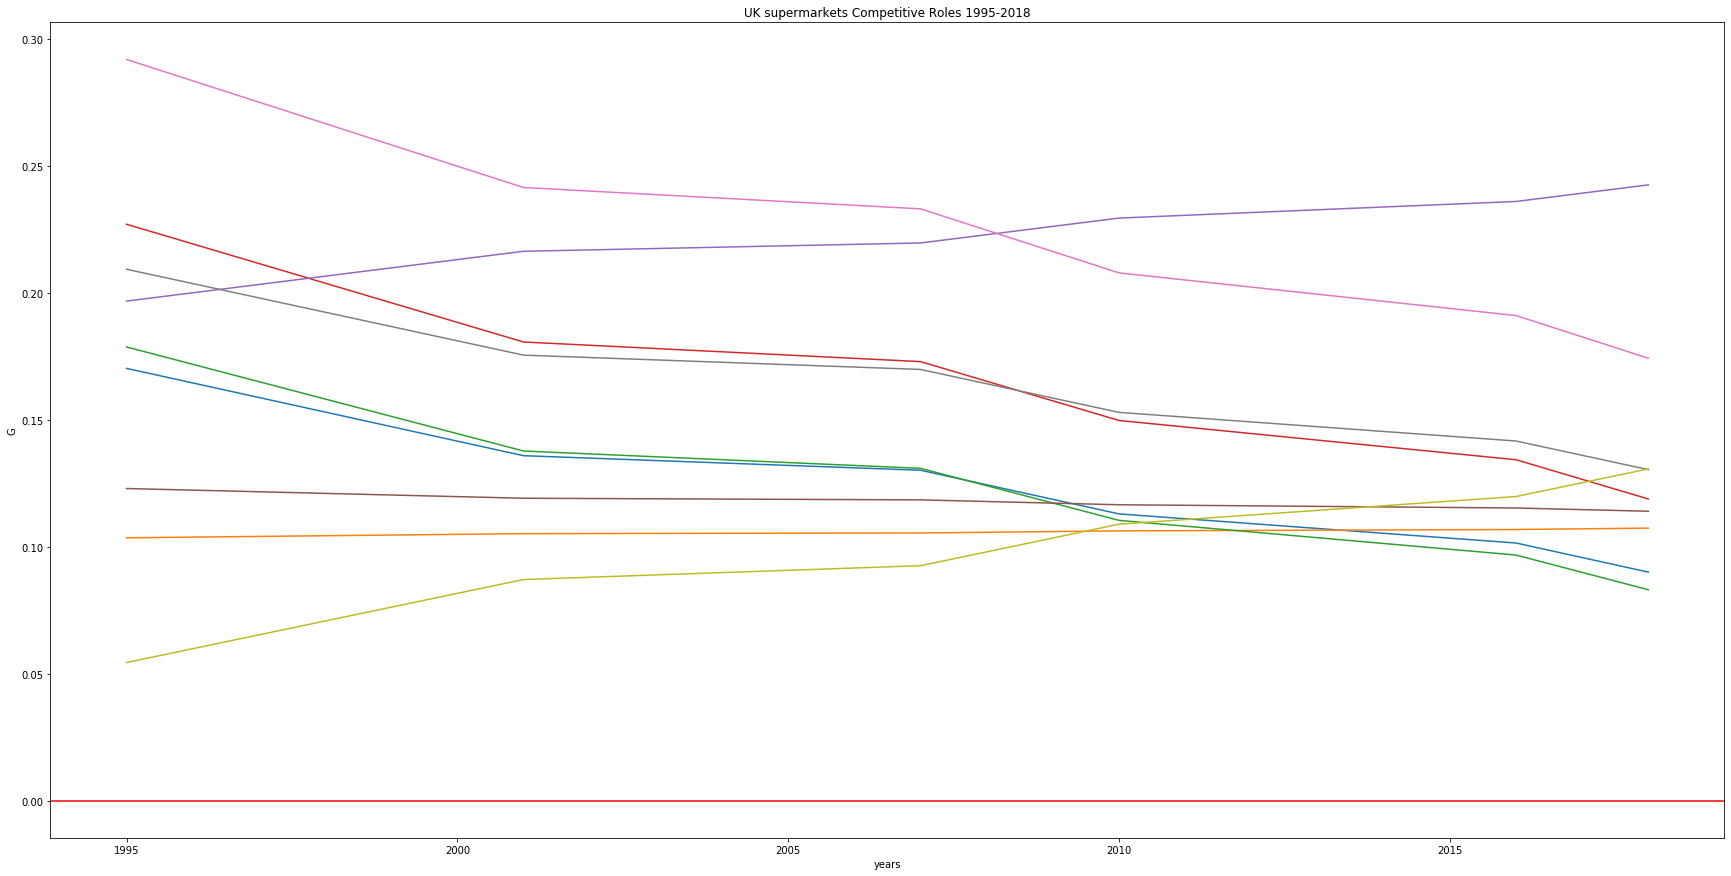

In [50]:
plt.figure(figsize=(30,15))
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title('UK supermarkets Competitive Roles 1995-2018')
plt.xlabel('years')
plt.ylabel('G')
plt.plot(Gdf)

In [51]:
#numpy.sign(data)
#construct interaction matrix

tescosign=np.sign(poptesco[2])
asdasign=np.sign(poptasda[2])
sainsburysign=np.sign(poptsainsbury[2])
morrisonsign=np.sign(poptmorrisons[2])
aldisign=np.sign(poptaldi[2])
coopsign=np.sign(poptcoop[2])
lidlsign=np.sign(poptlidl[2])
waitrosesign=np.sign(poptwaitrose[2])
icelandsign=np.sign(popticeland[2])

interaction=np.zeros(9)
interaction[0]=tescosign
interaction[1]=asdasign
interaction[2]=sainsburysign
interaction[3]=morrisonsign
interaction[4]=aldisign
interaction[5]=coopsign
interaction[6]=lidlsign
interaction[7]=waitrosesign
interaction[8]=icelandsign

community = np.outer(interaction,interaction).transpose()
community_matrix=np.asmatrix(community)

#plt.imshow(community_matrix, interpolation='nearest')
#plt.show()

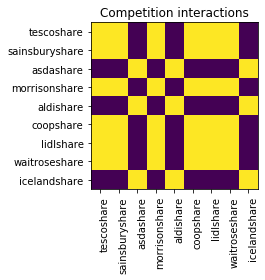

In [70]:
stores=list(sharesonlydf)

fig, ax = plt.subplots()
im = ax.imshow(community_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(stores)))
ax.set_yticks(np.arange(len(stores)))
# ... and label them with the respective list entries
ax.set_xticklabels(stores)
ax.set_yticklabels(stores)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(stores)):
    #for j in range(len(stores)):
        #text = ax.text(j, i, community_matrix[i, j],
                       #ha="center", va="center", color="w")

ax.set_title("Competition interactions")
fig.tight_layout()
plt.show()







The competitive roles are deduced from the signs of dij and dji.
    Type of interaction
+ + Pure competition
– + Predator–prey
– – Mutualism
– 0 Commensalism
+ 0 Amensalism
0 0 Neutralism

g tesco = -0.0017439886403064256
g aldi = 0.0009948898073427353


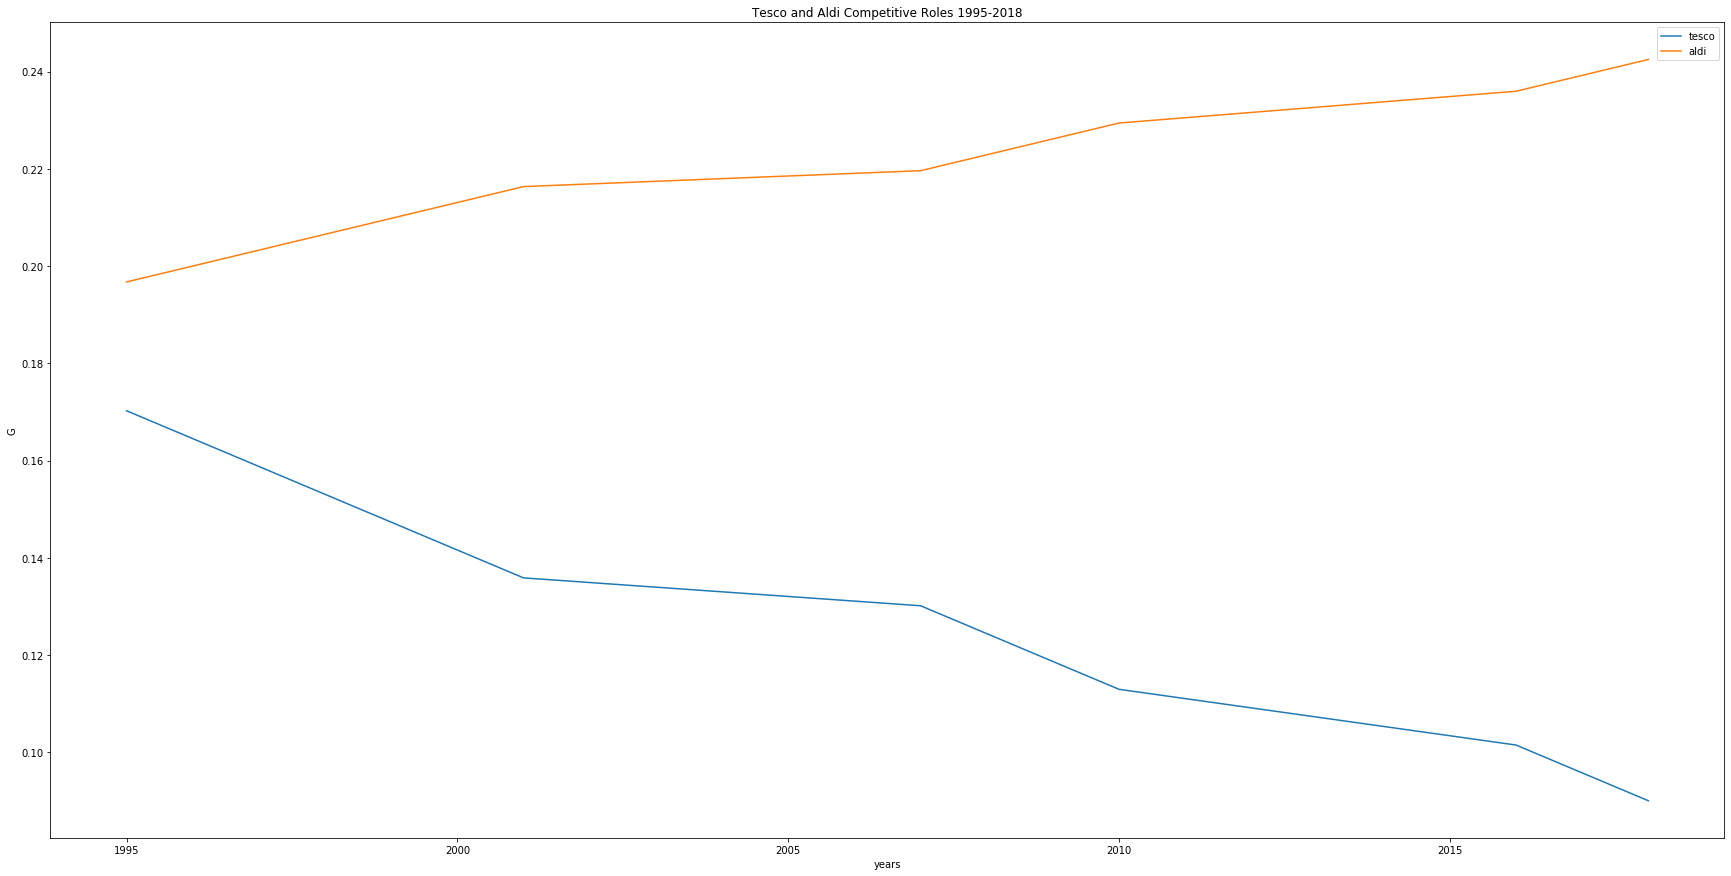

In [53]:
#tesco

for i in xdata:
    G1tesco= (poptesco[1] + 2*poptesco[2]*(i))

#aldi
for i in xdata:
    G1aldi= (poptaldi[1] + 2*poptaldi[2]*(i))
    
    
print('g tesco =', poptesco[2])
print('g aldi =', poptaldi[2])
plt.figure(figsize=(30,15))
plt.title('Tesco and Aldi Competitive Roles 1995-2018')
plt.xlabel('years')
plt.ylabel('G')
plt.plot(Gdf['tesco'], label='tesco')
plt.plot(Gdf['aldi'], label ='aldi')
plt.legend()
plt.show()






So for tesco and aldi.
pre 1997 tesco dij are -ve and aldi dij are +ve so we have a Predator-Prey interaction 
from 1997 - 2016 both dij are +ve so we have Pure Competition
post 2017 both dij are -ve so we have Commensalism

In [54]:
#Mean square error (MSE), mean absolute percentage error (MAPE), and fractional standard deviation (FS)

In [55]:
# long term predictions

In [56]:
#35 year forecast

# poly is fitting polynominal for marketshare 
#D is derivative of polynominal 
# G is G factor which indicates competitive role in LV equations


forecastdata = np.linspace(1995, 2050, 50)




# poly is fitting polynominal for marketshare 
#D is derivative of polynominal 
# G is G factor which indicates competitive role in LV equations

etesco=[]
Gtesco=[]
esainsbury=[]
Gsainsbury=[]
easda=[]
Gasda=[]
emorrisons=[]
Gmorrisons=[]
ealdi=[]
Galdi=[]
ecoop=[]
Gcoop=[]
elidl=[]
Glidl=[]
ewaitrose=[]
Gwaitrose=[]
eiceland=[]
Giceland=[]
eouter=[]
esum=[]

for i in forecastdata:
    poly1=np.exp(poptesco[0] + poptesco[1]*i +poptesco[2]*(i**2));etesco.append(poly1)
    Dtesco= (poptesco[1] + 2*poptesco[2]*(i));Gtesco.append(Dtesco)
    poly2=np.exp(poptsainsbury[0] + poptsainsbury[1]*i +poptsainsbury[2]*(i**2));esainsbury.append(poly2)
    Dsainsbury= (poptsainsbury[1] +2*poptsainsbury[2]*(i));Gsainsbury.append(Dsainsbury)
    poly3=np.exp(poptasda[0] + poptasda[1]*i +poptasda[2]*(i**2));easda.append(poly3)
    Dasda= (poptasda[1] +2*poptasda[2]*(i));Gasda.append(Dasda)
    poly4=np.exp(poptmorrisons[0] + poptmorrisons[1]*i +poptmorrisons[2]*(i**2));emorrisons.append(poly4)
    Dmorrisons= (poptmorrisons[1] +2*poptmorrisons[2]*(i));Gmorrisons.append(Dmorrisons)
    poly5=np.exp(poptaldi[0] + poptaldi[1]*i +poptaldi[2]*(i**2));ealdi.append(poly5)
    Daldi= (poptaldi[1] +2*poptaldi[2]*(i));Galdi.append(Daldi)
    poly6=np.exp(poptcoop[0] + poptcoop[1]*i +poptcoop[2]*(i**2));ecoop.append(poly6)
    Dcoop= (poptcoop[1] +2*poptcoop[2]*(i));Gcoop.append(Dcoop)
    poly7=np.exp(poptlidl[0] + poptlidl[1]*i +poptlidl[2]*(i**2));elidl.append(poly7)
    Dlidl= (poptlidl[1] +2*poptlidl[2]*(i));Glidl.append(Dlidl)
    poly8=np.exp(poptwaitrose[0] + poptwaitrose[1]*i +poptwaitrose[2]*(i**2));ewaitrose.append(poly8)
    Dwaitrose= (poptwaitrose[1] +2*poptwaitrose[2]*(i));Gwaitrose.append(Dwaitrose)
    poly9=np.exp(popticeland[0] + popticeland[1]*i +popticeland[2]*(i**2));eiceland.append(poly9)
    Diceland= (popticeland[1] +2*popticeland[2]*(i));Giceland.append(Diceland)

    poly10=poly1+poly2+poly3+poly4+poly5+poly6+poly7+poly8+poly9+1;esum.append(poly10)


In [57]:
x=forecastdata
ytesco = [b/m for b,m in zip(etesco, esum)]
ysainsbury = [b/m for b,m in zip(esainsbury, esum)]
yasda = [b/m for b,m in zip(easda, esum)]
ymorrison = [b/m for b,m in zip(emorrisons, esum)]
yaldi = [b/m for b,m in zip(ealdi, esum)]
ycoop = [b/m for b,m in zip(ecoop, esum)]
ylidl = [b/m for b,m in zip(elidl, esum)]
ywaitrose = [b/m for b,m in zip(ewaitrose, esum)]
yiceland = [b/m for b,m in zip(eiceland, esum)]

In [58]:
forecastdf=pd.DataFrame()
forecastdf['tesco']=ytesco
forecastdf['sainsbury']=ysainsbury
forecastdf['asda']=yasda
forecastdf['morrisons']=ymorrison
forecastdf['aldi']=yaldi
forecastdf['coop']=ycoop
forecastdf['lidl']=ylidl
forecastdf['waitrose']=ywaitrose
forecastdf['iceland']=yiceland
forecastdf['time']=forecastdata
forecastdf.set_index('time',drop=True, inplace=True)

forecastdf.head()

,tesco,sainsbury,asda,morrisons,aldi,coop,lidl,waitrose,iceland
time,,,,,,,,,
1995.000000,0.180453,0.184221,0.096251,0.028896,0.006643,0.053296,0.003151,0.013869,0.033109
1996.122449,0.197062,0.187092,0.106065,0.033605,0.007499,0.055299,0.003940,0.015825,0.031885
1997.244898,0.212979,0.188915,0.115576,0.038619,0.008437,0.057008,0.004867,0.017871,0.030651
1998.367347,0.227937,0.189768,0.124606,0.043881,0.009464,0.058425,0.005940,0.019986,0.029428
1999.489796,0.241720,0.189756,0.133005,0.049330,0.010591,0.059562,0.007169,0.022149,0.028238


In [59]:
forecastsum=forecastdf.sum(axis = 1, skipna = True)

outergoodforecast=1-forecastsum
#forecastdf['outergood']=outergoodforecast
forecastdf.head()

,tesco,sainsbury,asda,morrisons,aldi,coop,lidl,waitrose,iceland
time,,,,,,,,,
1995.000000,0.180453,0.184221,0.096251,0.028896,0.006643,0.053296,0.003151,0.013869,0.033109
1996.122449,0.197062,0.187092,0.106065,0.033605,0.007499,0.055299,0.003940,0.015825,0.031885
1997.244898,0.212979,0.188915,0.115576,0.038619,0.008437,0.057008,0.004867,0.017871,0.030651
1998.367347,0.227937,0.189768,0.124606,0.043881,0.009464,0.058425,0.005940,0.019986,0.029428
1999.489796,0.241720,0.189756,0.133005,0.049330,0.010591,0.059562,0.007169,0.022149,0.028238


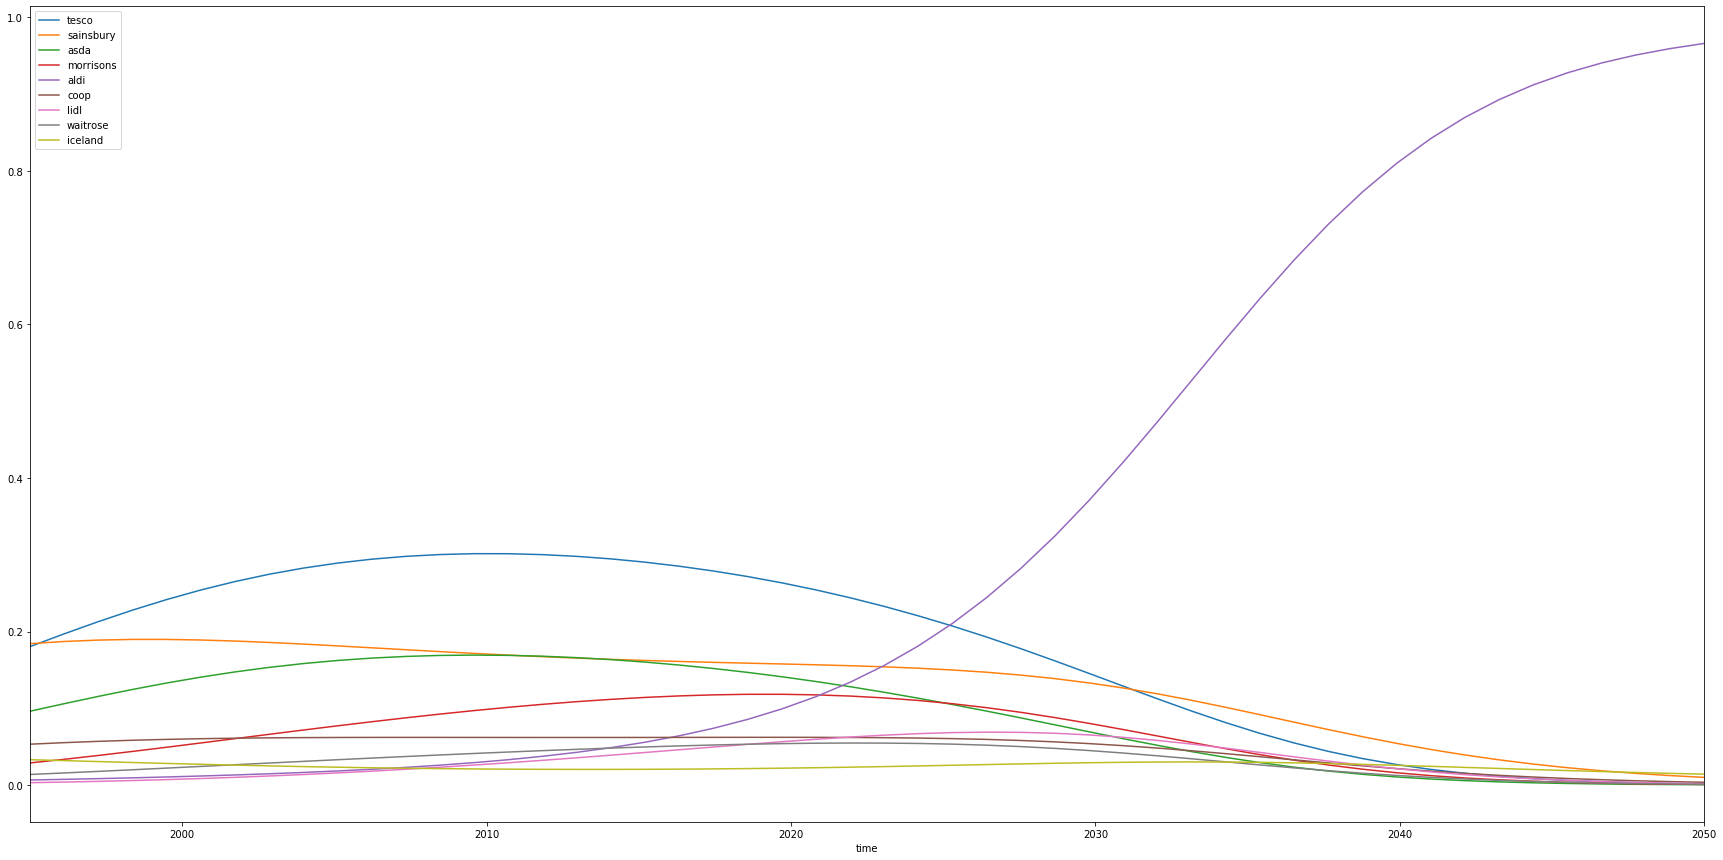

In [60]:
forecastdf.plot(figsize=(30,15))

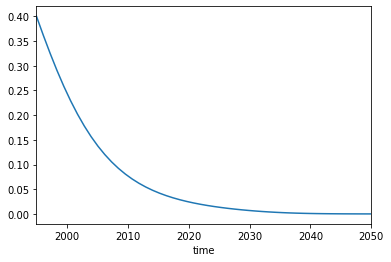

In [61]:
outergoodforecast.plot()

In [62]:
#5year forecast

# poly is fitting polynominal for marketshare 
#D is derivative of polynominal 
# G is G factor which indicates competitive role in LV equations

forecastdata = np.linspace(1995, 2025, 20)



# poly is fitting polynominal for marketshare 
#D is derivative of polynominal 
# G is G factor which indicates competitive role in LV equations

etesco=[]
Gtesco=[]
esainsbury=[]
Gsainsbury=[]
easda=[]
Gasda=[]
emorrisons=[]
Gmorrisons=[]
ealdi=[]
Galdi=[]
ecoop=[]
Gcoop=[]
elidl=[]
Glidl=[]
ewaitrose=[]
Gwaitrose=[]
eiceland=[]
Giceland=[]
eouter=[]
esum=[]

for i in forecastdata:
    poly1=np.exp(poptesco[0] + poptesco[1]*i +poptesco[2]*(i**2));etesco.append(poly1)
    Dtesco= (poptesco[1] + 2*poptesco[2]*(i));Gtesco.append(Dtesco)
    poly2=np.exp(poptsainsbury[0] + poptsainsbury[1]*i +poptsainsbury[2]*(i**2));esainsbury.append(poly2)
    Dsainsbury= (poptsainsbury[1] +2*poptsainsbury[2]*(i));Gsainsbury.append(Dsainsbury)
    poly3=np.exp(poptasda[0] + poptasda[1]*i +poptasda[2]*(i**2));easda.append(poly3)
    Dasda= (poptasda[1] +2*poptasda[2]*(i));Gasda.append(Dasda)
    poly4=np.exp(poptmorrisons[0] + poptmorrisons[1]*i +poptmorrisons[2]*(i**2));emorrisons.append(poly4)
    Dmorrisons= (poptmorrisons[1] +2*poptmorrisons[2]*(i));Gmorrisons.append(Dmorrisons)
    poly5=np.exp(poptaldi[0] + poptaldi[1]*i +poptaldi[2]*(i**2));ealdi.append(poly5)
    Daldi= (poptaldi[1] +2*poptaldi[2]*(i));Galdi.append(Daldi)
    poly6=np.exp(poptcoop[0] + poptcoop[1]*i +poptcoop[2]*(i**2));ecoop.append(poly6)
    Dcoop= (poptcoop[1] +2*poptcoop[2]*(i));Gcoop.append(Dcoop)
    poly7=np.exp(poptlidl[0] + poptlidl[1]*i +poptlidl[2]*(i**2));elidl.append(poly7)
    Dlidl= (poptlidl[1] +2*poptlidl[2]*(i));Glidl.append(Dlidl)
    poly8=np.exp(poptwaitrose[0] + poptwaitrose[1]*i +poptwaitrose[2]*(i**2));ewaitrose.append(poly8)
    Dwaitrose= (poptwaitrose[1] +2*poptwaitrose[2]*(i));Gwaitrose.append(Dwaitrose)
    poly9=np.exp(popticeland[0] + popticeland[1]*i +popticeland[2]*(i**2));eiceland.append(poly9)
    Diceland= (popticeland[1] +2*popticeland[2]*(i));Giceland.append(Diceland)

    poly10=poly1+poly2+poly3+poly4+poly5+poly6+poly7+poly8+poly9+1;esum.append(poly10)



In [63]:
x=forecastdata
ytesco = [b/m for b,m in zip(etesco, esum)]
ysainsbury = [b/m for b,m in zip(esainsbury, esum)]
yasda = [b/m for b,m in zip(easda, esum)]
ymorrison = [b/m for b,m in zip(emorrisons, esum)]
yaldi = [b/m for b,m in zip(ealdi, esum)]
ycoop = [b/m for b,m in zip(ecoop, esum)]
ylidl = [b/m for b,m in zip(elidl, esum)]
ywaitrose = [b/m for b,m in zip(ewaitrose, esum)]
yiceland = [b/m for b,m in zip(eiceland, esum)]

In [64]:
forecastdf=pd.DataFrame()
forecastdf['tesco']=ytesco
forecastdf['sainsbury']=ysainsbury
forecastdf['asda']=yasda
forecastdf['morrisons']=ymorrison
forecastdf['aldi']=yaldi
forecastdf['coop']=ycoop
forecastdf['lidl']=ylidl
forecastdf['waitrose']=ywaitrose
forecastdf['iceland']=yiceland
forecastdf['time']=forecastdata
forecastdf.set_index('time',drop=True, inplace=True)
forecastdf.head()

,tesco,sainsbury,asda,morrisons,aldi,coop,lidl,waitrose,iceland
time,,,,,,,,,
1995.000000,0.180453,0.184221,0.096251,0.028896,0.006643,0.053296,0.003151,0.013869,0.033109
1996.578947,0.203635,0.187956,0.109980,0.035610,0.007870,0.056030,0.004300,0.016647,0.031383
1998.157895,0.225230,0.189678,0.122965,0.042883,0.009265,0.058182,0.005728,0.019587,0.029655
1999.736842,0.244578,0.189649,0.134756,0.050548,0.010855,0.059777,0.007461,0.022630,0.027982
2001.315789,0.261238,0.188222,0.145016,0.058430,0.012681,0.060878,0.009521,0.025721,0.026415


In [65]:
forecastsum=forecastdf.sum(axis = 1, skipna = True)

outergoodforecast=1-forecastsum
#forecastdf['outergood']=outergoodforecast
forecastdf.head()

,tesco,sainsbury,asda,morrisons,aldi,coop,lidl,waitrose,iceland
time,,,,,,,,,
1995.000000,0.180453,0.184221,0.096251,0.028896,0.006643,0.053296,0.003151,0.013869,0.033109
1996.578947,0.203635,0.187956,0.109980,0.035610,0.007870,0.056030,0.004300,0.016647,0.031383
1998.157895,0.225230,0.189678,0.122965,0.042883,0.009265,0.058182,0.005728,0.019587,0.029655
1999.736842,0.244578,0.189649,0.134756,0.050548,0.010855,0.059777,0.007461,0.022630,0.027982
2001.315789,0.261238,0.188222,0.145016,0.058430,0.012681,0.060878,0.009521,0.025721,0.026415


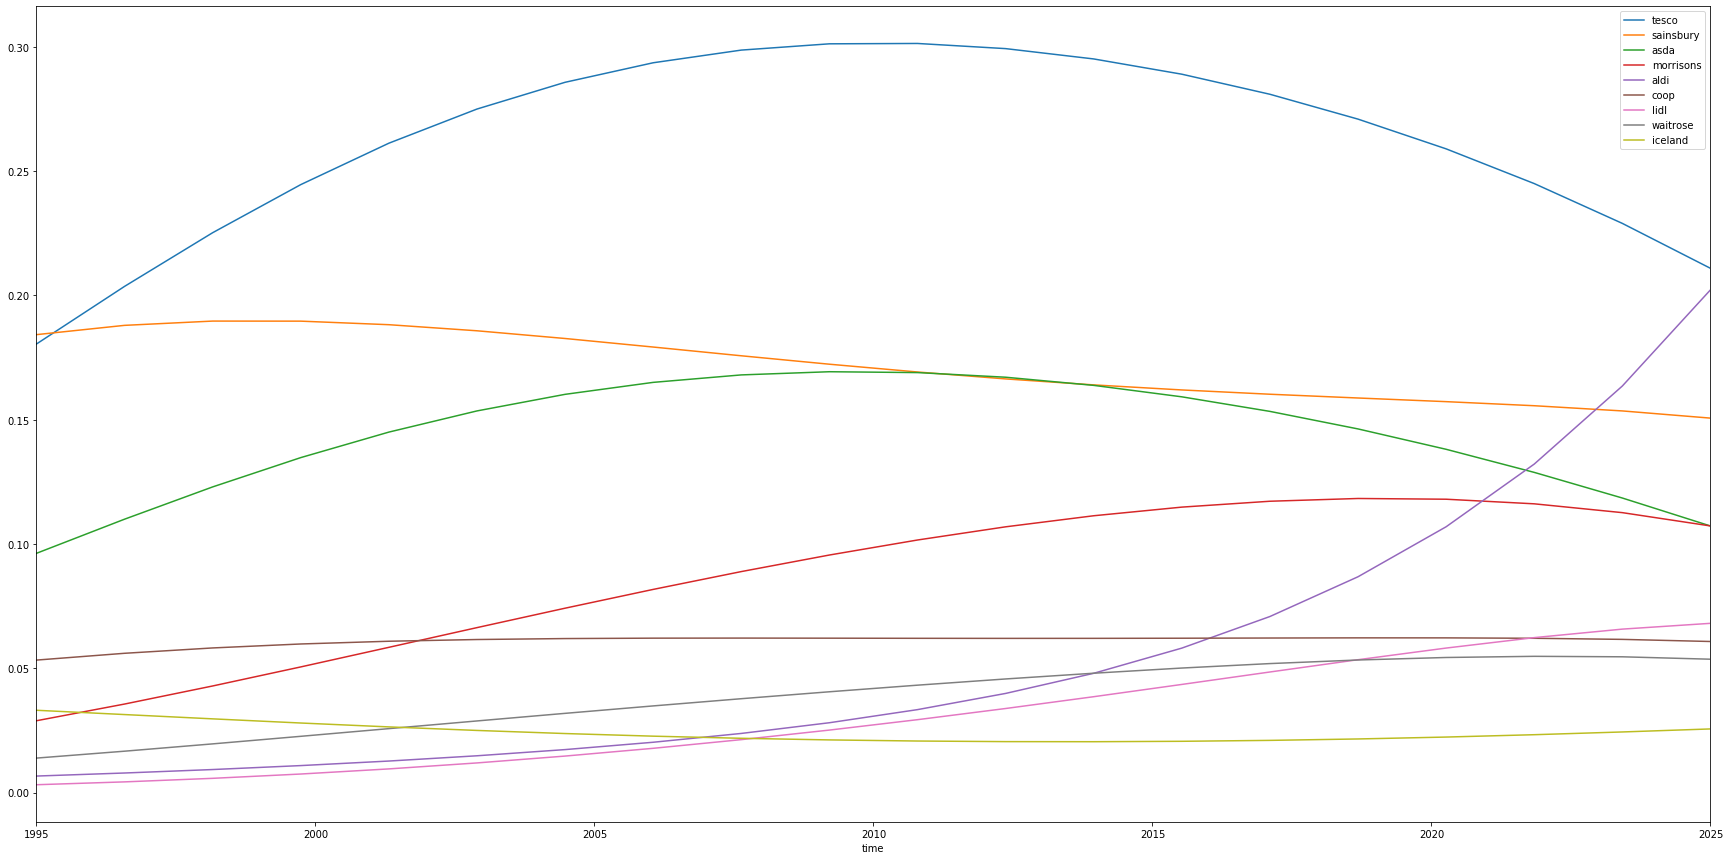

In [66]:
forecastdf.plot(figsize=(30,15))

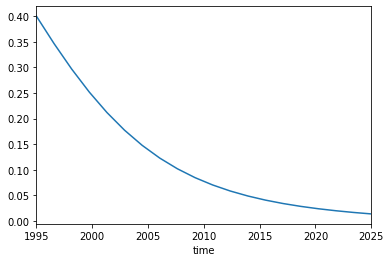

In [67]:
outergoodforecast.plot()